In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#path = __file__[: __file__.rindex("\\")]+"\\"
path = os.getcwd()
print(path)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

c:\Users\karth\Desktop\Projects\credit-card-fraud


In [34]:
test = pd.read_csv(f'{path}\\data\\test.csv')#.replace('\\','/'))
train = pd.read_csv(f'{path}\\data\\train.csv')

In [35]:
class Wrangler:
    
    def __init__(self, train, test, prnt=True):
        self.data = {}
        self.data['train'] = train
        self.data['test'] = test
        self.data['cols'] = set(train.columns) - set(['id', 'Class'])
        
        if prnt:
            print(f'Columns:')
            for col in self.data['train'].columns:
                print(col)
            
    def countna(self, data):
        print('Missing Rows')
        for col in self.data[data]:
            print(f'{col} - {sum(self.data[data][col].isna())}')
            
    def corr(self, data, type='norm'):
        corr = self.data[data].corr()
        plt.matshow(corr)
        
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
        plt.yticks(range(len(corr.columns)), corr.columns, rotation=0)
        
        plt.show()

        
        print(abs(pd.Series(corr['Class'])).sort_values(ascending=False))

    def describe(self, data):
        print(pd.DataFrame(self.data[data]).describe())

    def prob_distr(self, data,sample=1000,steps=5):
        interest = pd.DataFrame(self.data[data])
        indices = list(np.random.randint(0,len(interest), sample))
        interest = interest.sample(sample)
        print(interest.columns)
        for col in self.data['cols']:
            interest.hist(column=col, bins=(len(interest)//steps))
            plt.show()

In [36]:
trn = 'train'
tst = 'test'

                  id           Time             V1             V2  \
count  219129.000000  219129.000000  219129.000000  219129.000000   
mean   109564.000000   62377.415376       0.096008       0.048345   
std     63257.237906   25620.348569       1.395425       1.159805   
min         0.000000       0.000000     -29.807725     -44.247914   
25%     54782.000000   47933.000000      -0.846135      -0.573728   
50%    109564.000000   63189.000000       0.385913       0.046937   
75%    164346.000000   77519.000000       1.190661       0.814145   
max    219128.000000  120580.000000       2.430494      16.068473   

                  V3             V4             V5             V6  \
count  219129.000000  219129.000000  219129.000000  219129.000000   
mean        0.592102       0.069273      -0.161555       0.133688   
std         1.132884       1.253125       1.069530       1.202411   
min       -19.722872      -5.263650     -37.591259     -25.659750   
25%        -0.027154      -0.7692

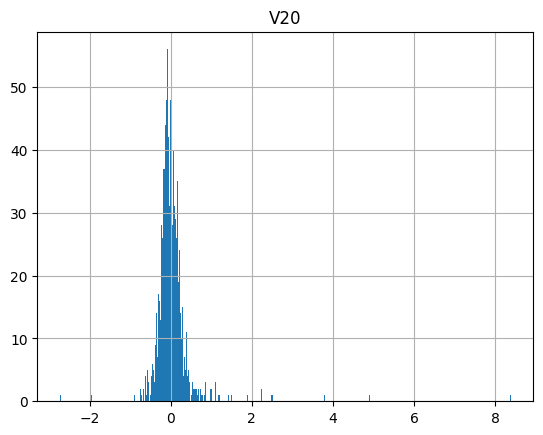

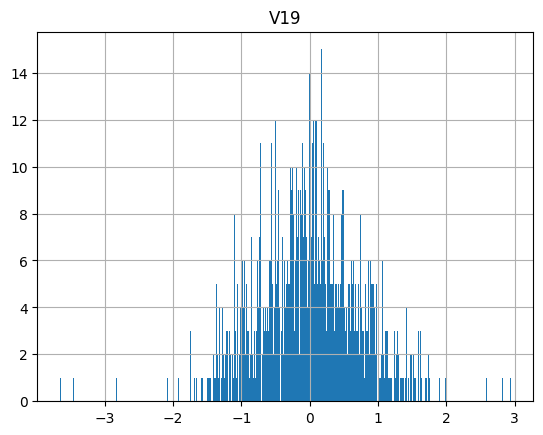

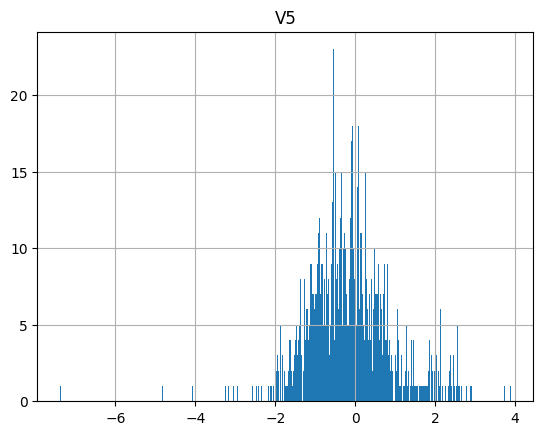

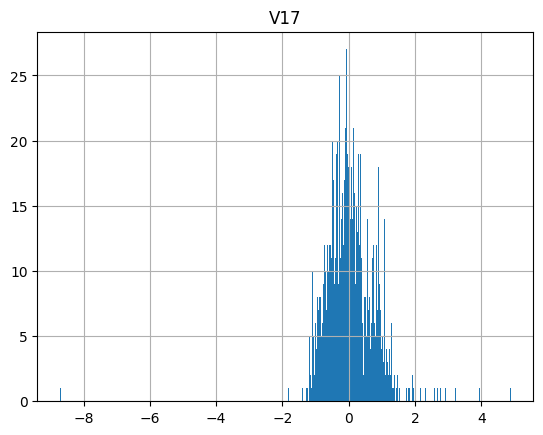

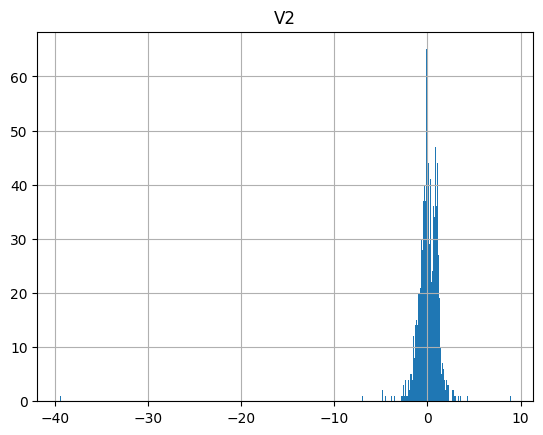

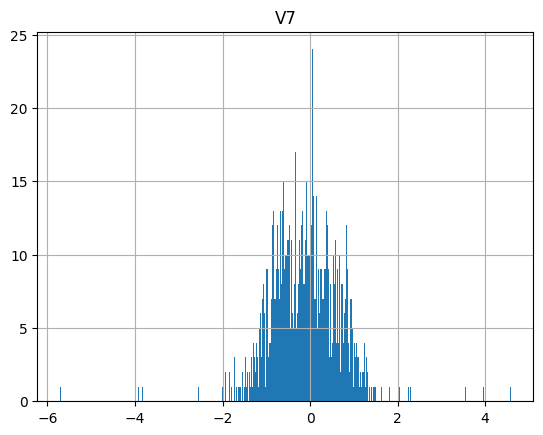

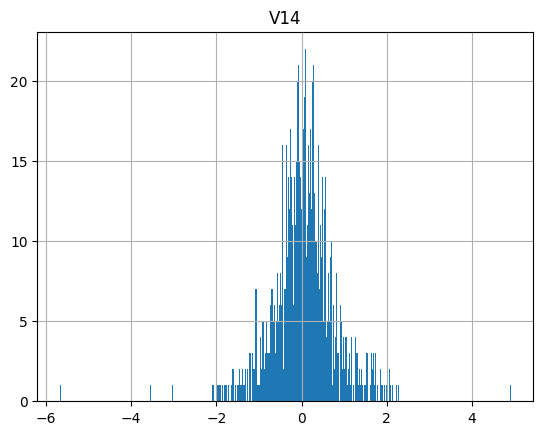

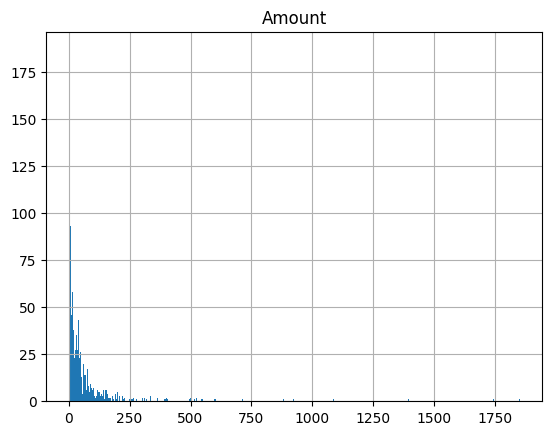

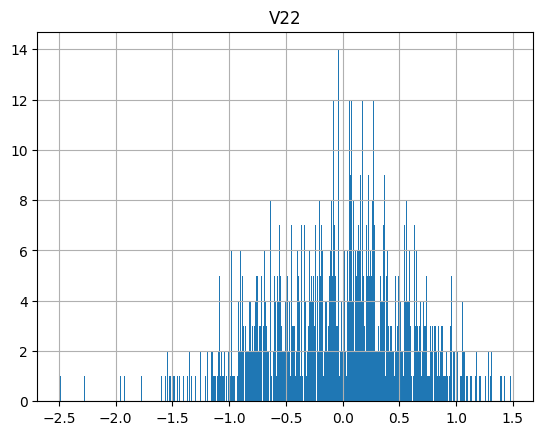

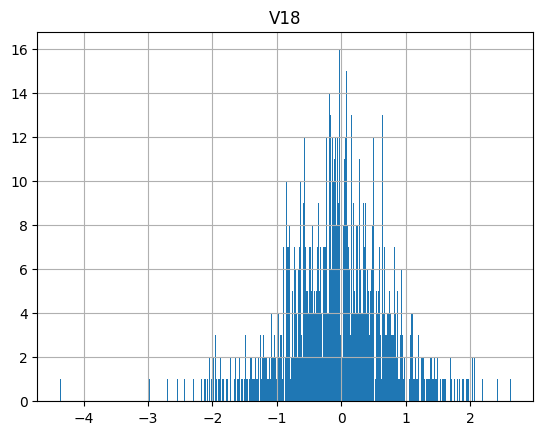

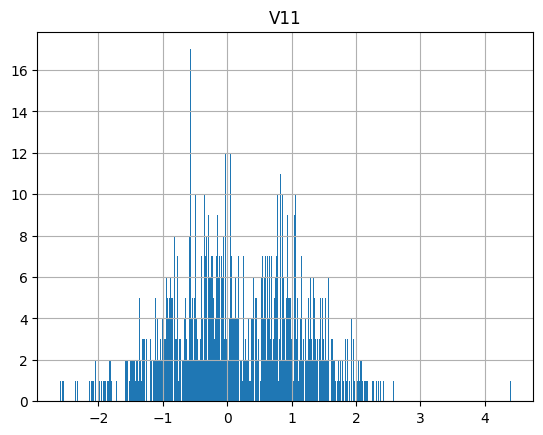

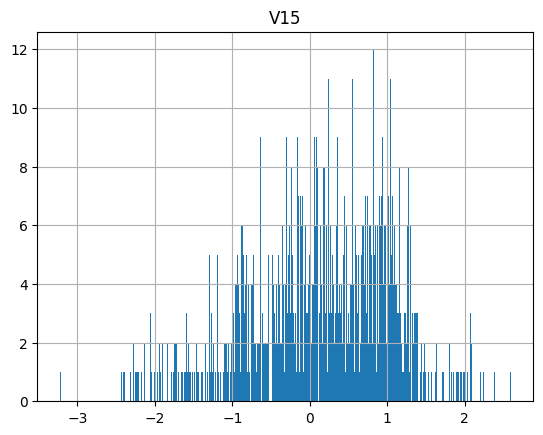

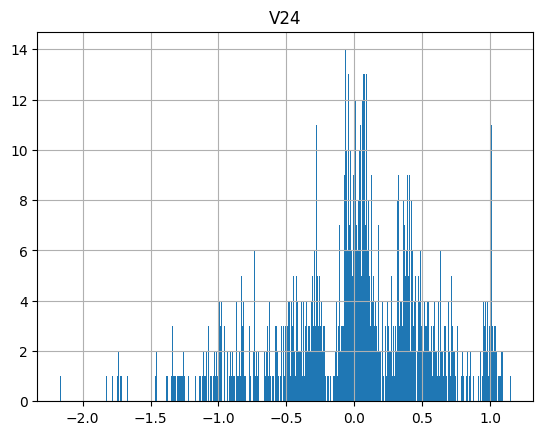

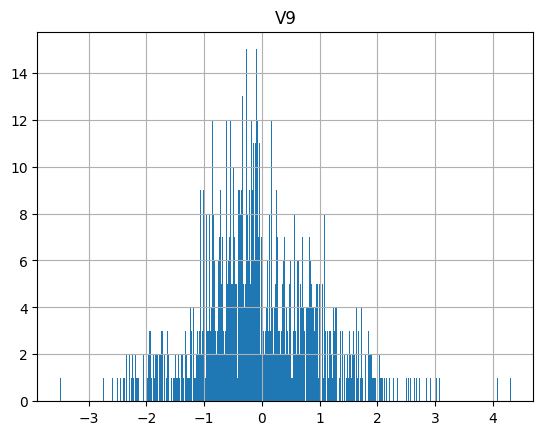

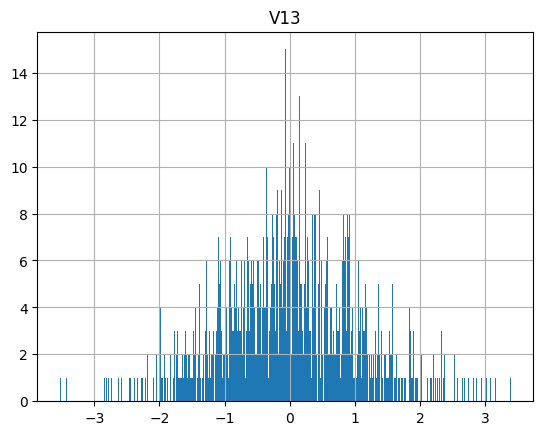

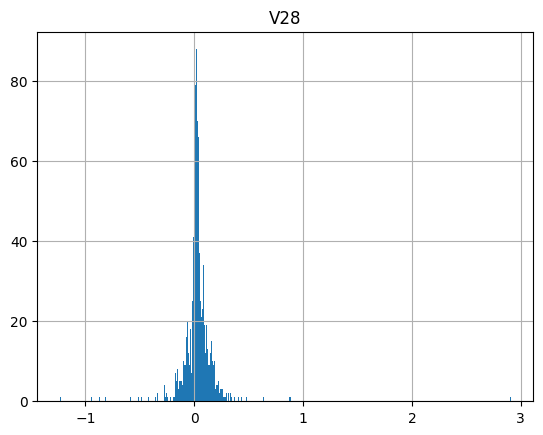

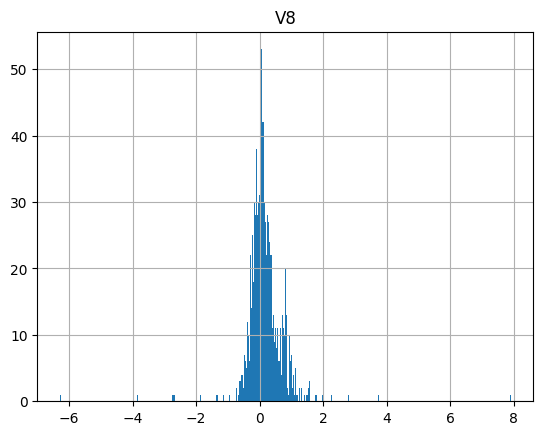

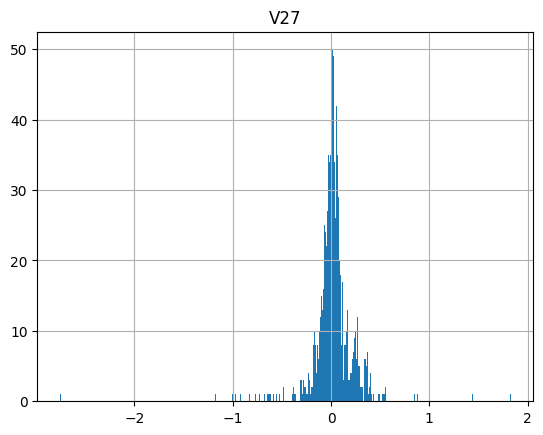

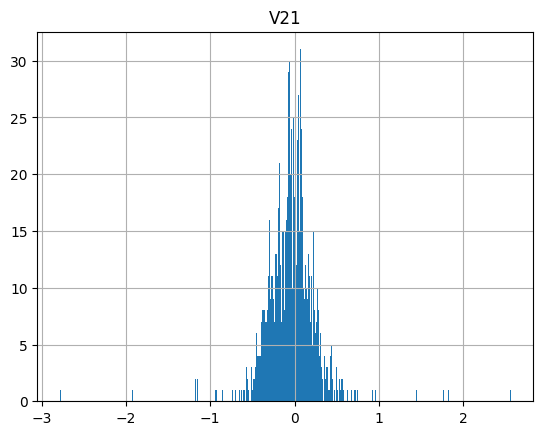

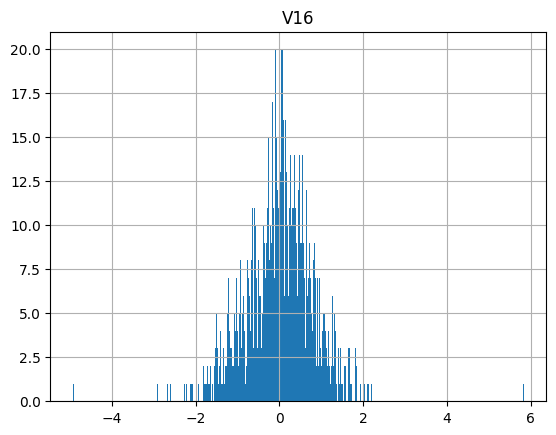

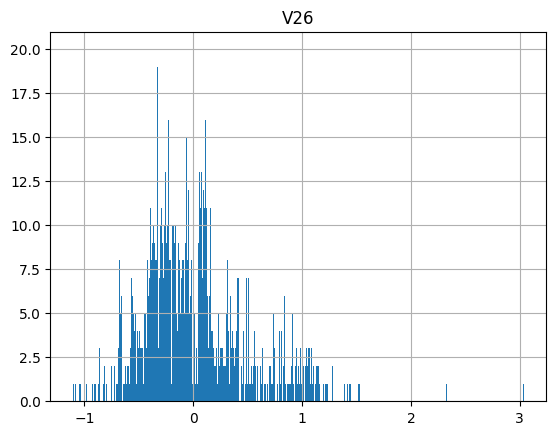

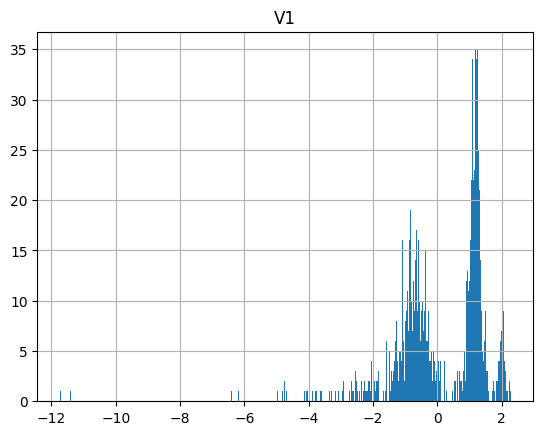

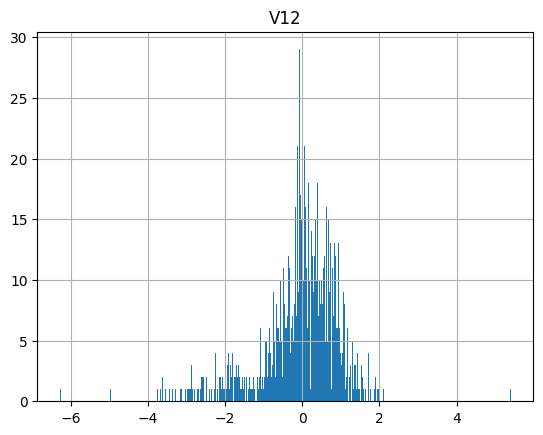

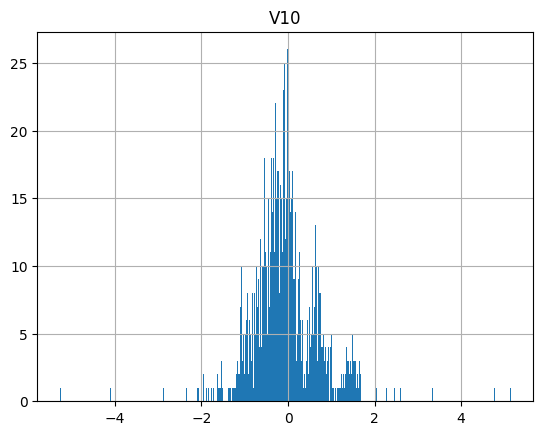

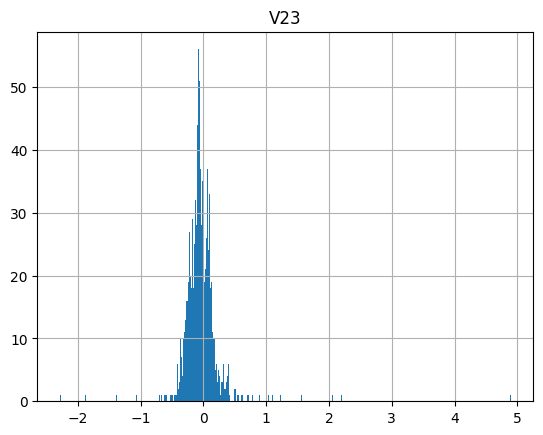

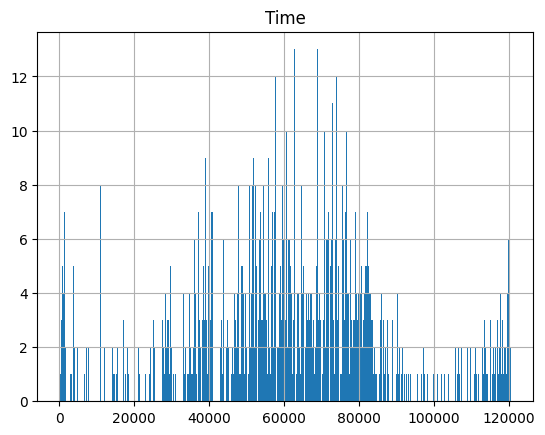

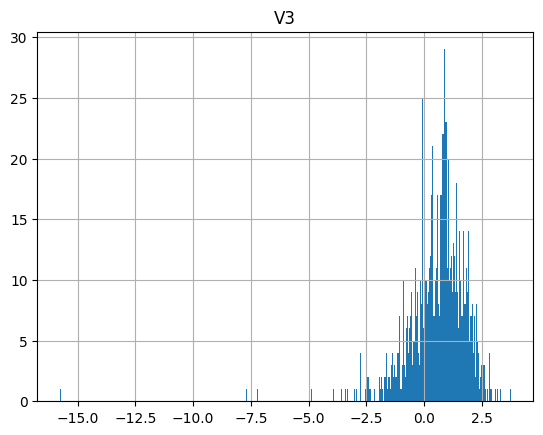

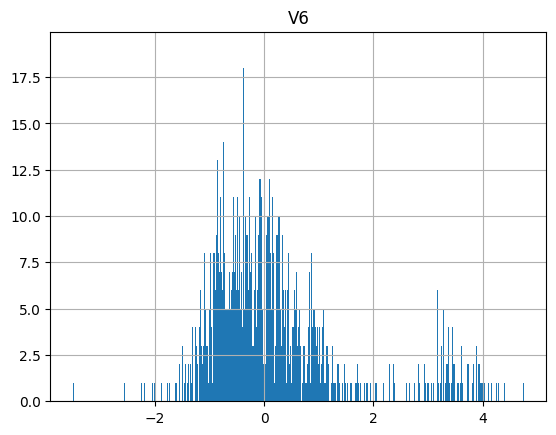

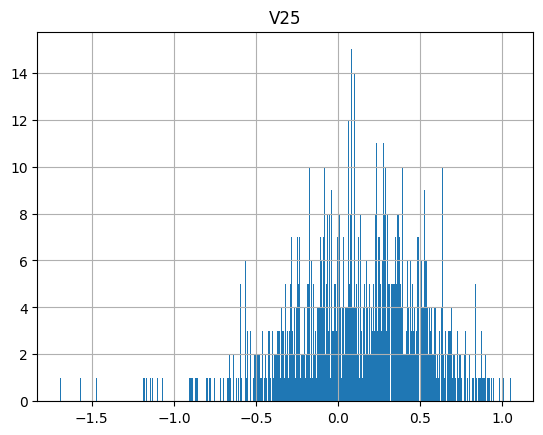

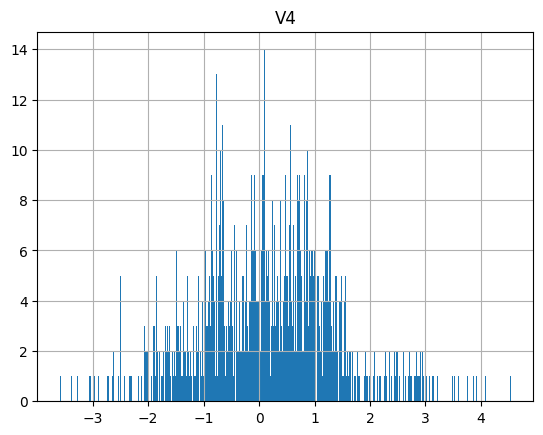

In [38]:
data = Wrangler(train, test, False)

data.describe(trn)

data.prob_distr(trn, steps=2)